<a href="https://colab.research.google.com/github/harunpirim/graph-data-science-course/blob/main/notebooks/01-introduction-to-network-science.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Network Science

This notebook provides a comprehensive introduction to network science and graph theory fundamentals.

## Learning Objectives
- Understand basic network science concepts
- Learn graph theory fundamentals
- Explore different types of networks
- Analyze network properties and metrics
- Understand real-world network applications

In [1]:
# Import required libraries
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Set style for better plots
plt.style.use('default')
sns.set_palette("husl")

# For better display in notebooks
%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 8)

print("Network Science Libraries Imported Successfully!")

Network Science Libraries Imported Successfully!


## 1. What is Network Science?

Network Science is the study of complex systems represented as networks (graphs) where entities are nodes and relationships are edges.

In [5]:
# Create a simple example network
G_simple = nx.Graph()

# Add nodes (entities)
G_simple.add_nodes_from(['Alice', 'Bob', 'Charlie', 'Diana', 'Eve'])

# Add edges (relationships)
G_simple.add_edges_from([
    ('Alice', 'Bob'),
    ('Alice', 'Charlie'),
    ('Bob', 'Charlie'),
    ('Charlie', 'Diana'),
    ('Diana', 'Eve'),
    ('Eve', 'Alice')
])

print(f"Network: {G_simple.number_of_nodes()} nodes, {G_simple.number_of_edges()} edges")
print(f"Nodes: {list(G_simple.nodes())}")
print(f"Edges: {list(G_simple.edges())}")
list(G_simple.neighbors("Alice"))

Network: 5 nodes, 6 edges
Nodes: ['Alice', 'Bob', 'Charlie', 'Diana', 'Eve']
Edges: [('Alice', 'Bob'), ('Alice', 'Charlie'), ('Alice', 'Eve'), ('Bob', 'Charlie'), ('Charlie', 'Diana'), ('Diana', 'Eve')]


['Bob', 'Charlie', 'Eve']

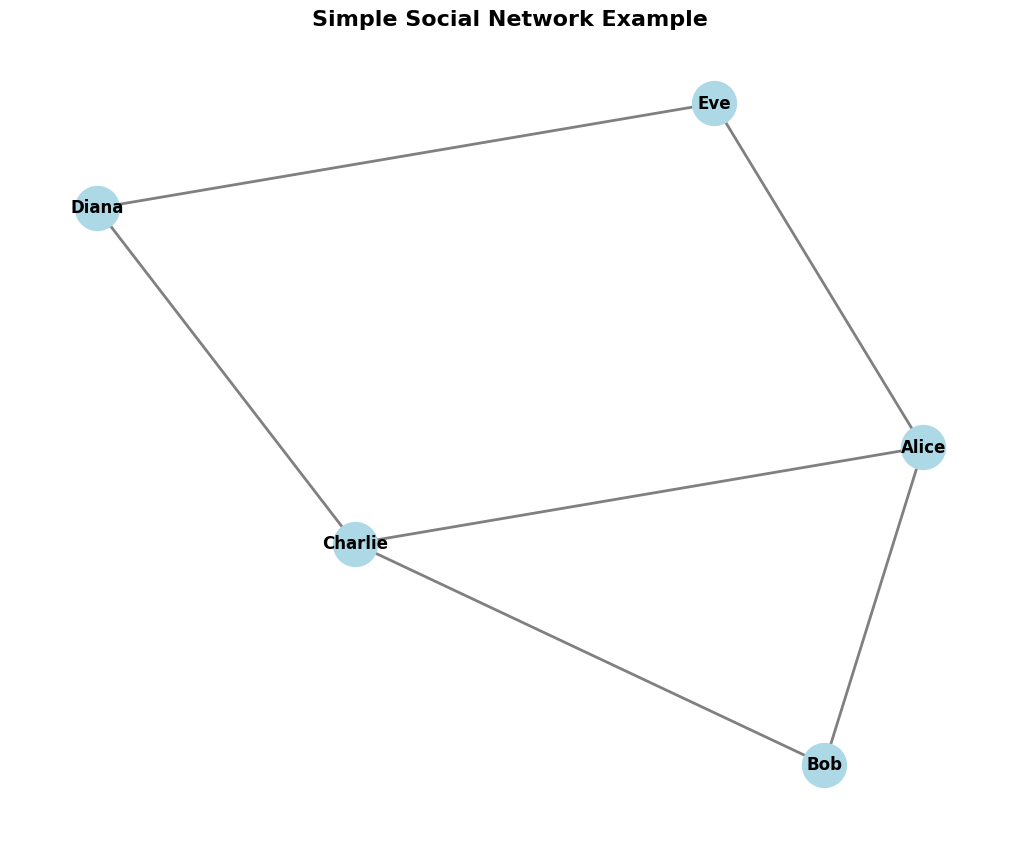

In [4]:
# Visualize the simple network
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G_simple, seed=42)

nx.draw(G_simple, pos, with_labels=True, node_color='lightblue',
        node_size=1000, font_size=12, font_weight='bold',
        edge_color='gray', width=2)

plt.title('Simple Social Network Example', fontsize=16, fontweight='bold')
plt.show()

## 2. Types of Networks

Networks can be classified into different types based on their properties.

In [ ]:
# Create different types of networks

# 1. Undirected Network (like friendship)
G_undirected = nx.Graph()
G_undirected.add_edges_from([(1, 2), (2, 3), (3, 1), (3, 4), (4, 5)])

# 2. Directed Network (like following on social media)
G_directed = nx.DiGraph()
G_directed.add_edges_from([(1, 2), (2, 3), (3, 1), (3, 4), (4, 5)])

# 3. Weighted Network (like communication frequency)
G_weighted = nx.Graph()
G_weighted.add_weighted_edges_from([
    (1, 2, 0.8), (2, 3, 0.6), (3, 1, 0.9),
    (3, 4, 0.3), (4, 5, 0.7)
])

print("Network Types Created:")
print(f"1. Undirected: {G_undirected.number_of_nodes()} nodes, {G_undirected.number_of_edges()} edges")
print(f"2. Directed: {G_directed.number_of_nodes()} nodes, {G_directed.number_of_edges()} edges")
print(f"3. Weighted: {G_weighted.number_of_nodes()} nodes, {G_weighted.number_of_edges()} edges")

In [ ]:
# Visualize different network types
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Undirected
pos1 = nx.spring_layout(G_undirected, seed=42)
nx.draw(G_undirected, pos1, ax=axes[0], with_labels=True,
        node_color='lightblue', node_size=500, font_size=10)
axes[0].set_title('Undirected Network', fontweight='bold')

# Directed
pos2 = nx.spring_layout(G_directed, seed=42)
nx.draw(G_directed, pos2, ax=axes[1], with_labels=True,
        node_color='lightgreen', node_size=500, font_size=10,
        arrows=True, arrowsize=20)
axes[1].set_title('Directed Network', fontweight='bold')

# Weighted
pos3 = nx.spring_layout(G_weighted, seed=42)
weights = [G_weighted[u][v]['weight'] for u, v in G_weighted.edges()]
nx.draw(G_weighted, pos3, ax=axes[2], with_labels=True,
        node_color='lightcoral', node_size=500, font_size=10,
        width=weights, edge_color='red')
axes[2].set_title('Weighted Network', fontweight='bold')

plt.tight_layout()
plt.show()

## 3. Basic Network Properties

Let's explore fundamental network properties and metrics.

In [ ]:
# Create a larger example network
G_example = nx.erdos_renyi_graph(20, 0.15, seed=42)

# Basic properties
print("Network Properties:")
print(f"Number of nodes: {G_example.number_of_nodes()}")
print(f"Number of edges: {G_example.number_of_edges()}")
print(f"Density: {nx.density(G_example):.3f}")
print(f"Average degree: {sum(dict(G_example.degree()).values()) / G_example.number_of_nodes():.2f}")
print(f"Is connected: {nx.is_connected(G_example)}")
print(f"Number of components: {nx.number_connected_components(G_example)}")

# Degree distribution
degrees = [d for n, d in G_example.degree()]
print(f"\nDegree Statistics:")
print(f"Minimum degree: {min(degrees)}")
print(f"Maximum degree: {max(degrees)}")
print(f"Average degree: {np.mean(degrees):.2f}")
print(f"Standard deviation: {np.std(degrees):.2f}")

In [ ]:
# Visualize the example network with degree information
plt.figure(figsize=(15, 6))

# Network visualization
plt.subplot(1, 2, 1)
pos = nx.spring_layout(G_example, seed=42)
node_colors = [G_example.degree(node) for node in G_example.nodes()]

nx.draw(G_example, pos, with_labels=True, node_color=node_colors,
        cmap=plt.cm.Reds, node_size=500, font_size=8)
plt.title('Example Network (Node Color = Degree)', fontweight='bold')

# Degree distribution
plt.subplot(1, 2, 2)
plt.hist(degrees, bins=range(min(degrees), max(degrees) + 2),
         alpha=0.7, color='skyblue', edgecolor='black')
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.title('Degree Distribution')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 4. Real-World Network Examples

Let's explore some famous real-world networks.

In [ ]:
# Load famous network datasets

# 1. Karate Club Network (Zachary's karate club)
G_karate = nx.karate_club_graph()

# 2. Les Miserables Network
G_lesmis = nx.les_miserables_graph()

# 3. Florentine Families Network
G_florentine = nx.florentine_families_graph()

print("Famous Network Datasets:")
print(f"1. Karate Club: {G_karate.number_of_nodes()} nodes, {G_karate.number_of_edges()} edges")
print(f"2. Les Miserables: {G_lesmis.number_of_nodes()} nodes, {G_lesmis.number_of_edges()} edges")
print(f"3. Florentine Families: {G_florentine.number_of_nodes()} nodes, {G_florentine.number_of_edges()} edges")

In [ ]:
# Visualize famous networks
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Karate Club
pos1 = nx.spring_layout(G_karate, seed=42)
nx.draw(G_karate, pos1, ax=axes[0], with_labels=False,
        node_color='lightblue', node_size=100)
axes[0].set_title('Zachary\'s Karate Club', fontweight='bold')

# Les Miserables
pos2 = nx.spring_layout(G_lesmis, seed=42)
nx.draw(G_lesmis, pos2, ax=axes[1], with_labels=False,
        node_color='lightgreen', node_size=50)
axes[1].set_title('Les Miserables Characters', fontweight='bold')

# Florentine Families
pos3 = nx.spring_layout(G_florentine, seed=42)
nx.draw(G_florentine, pos3, ax=axes[2], with_labels=True,
        node_color='lightcoral', node_size=300, font_size=8)
axes[2].set_title('Florentine Families', fontweight='bold')

plt.tight_layout()
plt.show()

## 5. Network Applications

Network science has applications in many fields.

In [ ]:
# Example: Social Network Analysis
print("Network Science Applications:")
print("\n1. Social Networks:")
print("   - Facebook friendship networks")
print("   - Twitter follower networks")
print("   - LinkedIn professional networks")

print("\n2. Biological Networks:")
print("   - Protein-protein interaction networks")
print("   - Gene regulatory networks")
print("   - Food webs")

print("\n3. Technological Networks:")
print("   - Internet topology")
print("   - Power grids")
print("   - Transportation networks")

print("\n4. Information Networks:")
print("   - World Wide Web")
print("   - Citation networks")
print("   - Wikipedia link networks")

print("\n5. Economic Networks:")
print("   - Trade networks")
print("   - Financial networks")
print("   - Supply chains")

## 6. Network Analysis Workflow

A typical network analysis workflow involves several steps.

In [ ]:
# Demonstrate a simple network analysis workflow

# Step 1: Data Collection (simulated)
print("Step 1: Data Collection")
print("   - Collect node and edge data")
print("   - Clean and preprocess data")
print("   - Handle missing values")

# Step 2: Network Construction
print("\nStep 2: Network Construction")
print("   - Create network from data")
print("   - Choose appropriate network type")
print("   - Validate network structure")

# Step 3: Basic Analysis
print("\nStep 3: Basic Analysis")
print("   - Calculate network properties")
print("   - Identify key nodes")
print("   - Analyze network structure")

# Step 4: Advanced Analysis
print("\nStep 4: Advanced Analysis")
print("   - Community detection")
print("   - Centrality measures")
print("   - Network dynamics")

# Step 5: Visualization and Interpretation
print("\nStep 5: Visualization and Interpretation")
print("   - Create visualizations")
print("   - Interpret results")
print("   - Draw conclusions")

In [ ]:
# Example workflow with the Karate Club network
print("\nExample Workflow with Karate Club Network:")

# Basic properties
print(f"\n1. Network Properties:")
print(f"   Nodes: {G_karate.number_of_nodes()}")
print(f"   Edges: {G_karate.number_of_edges()}")
print(f"   Density: {nx.density(G_karate):.3f}")
print(f"   Connected: {nx.is_connected(G_karate)}")

# Key nodes (highest degree)
degrees = dict(G_karate.degree())
top_nodes = sorted(degrees.items(), key=lambda x: x[1], reverse=True)[:5]
print(f"\n2. Top 5 Nodes by Degree:")
for node, degree in top_nodes:
    print(f"   Node {node}: {degree} connections")

# Network diameter
print(f"\n3. Network Diameter: {nx.diameter(G_karate)}")
print(f"   Average Shortest Path: {nx.average_shortest_path_length(G_karate):.2f}")

# Clustering
print(f"\n4. Clustering Coefficient: {nx.average_clustering(G_karate):.3f}")

## 7. Summary and Key Concepts

### Key Takeaways:

1. **Network Science**: Study of complex systems as networks
2. **Nodes and Edges**: Basic building blocks of networks
3. **Network Types**: Undirected, directed, weighted networks
4. **Network Properties**: Density, degree distribution, connectivity
5. **Applications**: Social, biological, technological, information networks
6. **Analysis Workflow**: Data collection → Construction → Analysis → Visualization

### Next Steps:
- Learn about network connectivity and paths
- Explore centrality measures
- Study community detection
- Understand network dynamics

### Tools and Libraries:
- **NetworkX**: Python library for network analysis
- **Matplotlib/Plotly**: Visualization tools
- **NumPy/Pandas**: Data manipulation
- **Gephi**: Advanced network visualization software